In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
rawdata=pd.read_csv("D:\code\python\ML\ML_data\loan_dataset.csv")

In [3]:
rawdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
rawdata.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
rawdata.shape

(614, 13)

In [6]:
rawdata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
rawdata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# droping missing values
data=rawdata.dropna()

In [9]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
data.shape

(480, 13)

# Lebel Encoding 

In [11]:
# replace the Gender values 'Male=1,Female=0' for better prediction in machine learning model.
data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
data

C:\Users\Pradhuman_kumar(pk)\AppData\Local\Temp\ipykernel_14372\3706404780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
# replace the Married values 'Yes=1,No=0'
data.replace({'Married':{'Yes':1,'No':0}},inplace=True)
data

C:\Users\Pradhuman_kumar(pk)\AppData\Local\Temp\ipykernel_14372\3754889060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'Married':{'Yes':1,'No':0}},inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
# replace the Dependents values '3+ =4' because + sign with number or single is not considered
data=data.replace({'Dependents':{"3+":4}})
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
# replace the Education values 'Graduate=1,Not Graduate=0'
data.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,1,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,4,1,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
# replace the Self_Employed values 'yes=1,no=0'
data.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
# replace the Property_Area values 'Urban=2,Semiurban=1,Rural=0'
data.replace({'Property_Area':{'Urban':2,'Semiurban':1,'Rural':0}},inplace=True)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,Y


In [17]:
# replace the Loan_Status values 'N=0,Y=1'
data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


# Data visualization

<Axes: xlabel='Education', ylabel='count'>

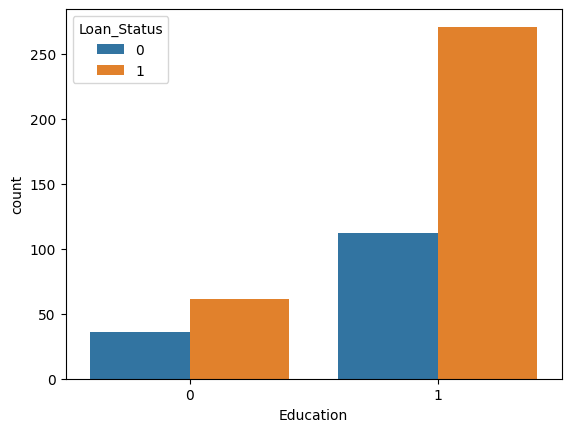

In [18]:
# visualisation of data for education with loan_status
sb.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Married', ylabel='count'>

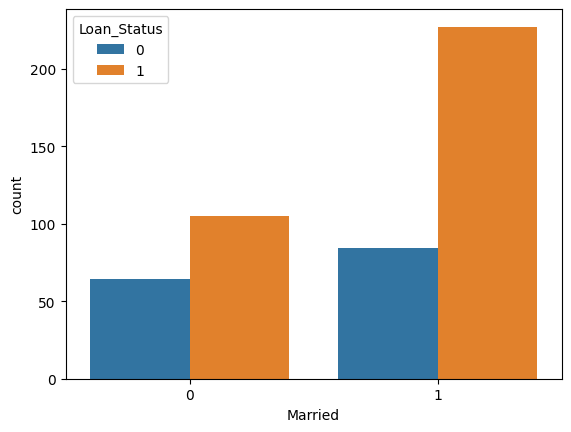

In [19]:
# visualisation of data for married with loan_status
sb.countplot(x='Married',hue='Loan_Status',data=data)

In [20]:
# visualisation of data for Gender with loan_status
sb.countplot(x='Gender',hue='Loan_Status',data=data)

<Axes: xlabel='Gender', ylabel='count'>

<Axes: xlabel='Property_Area', ylabel='count'>

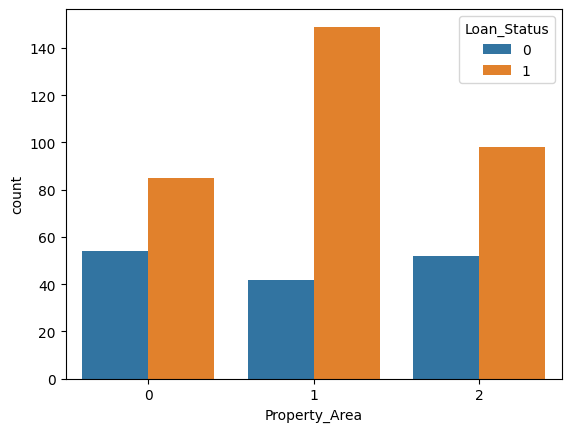

In [ ]:
# visualisation of data for Property_Area with loan_status
sb.countplot(x='Property_Area',hue='Loan_Status',data=data)

<Axes: xlabel='Dependents', ylabel='count'>

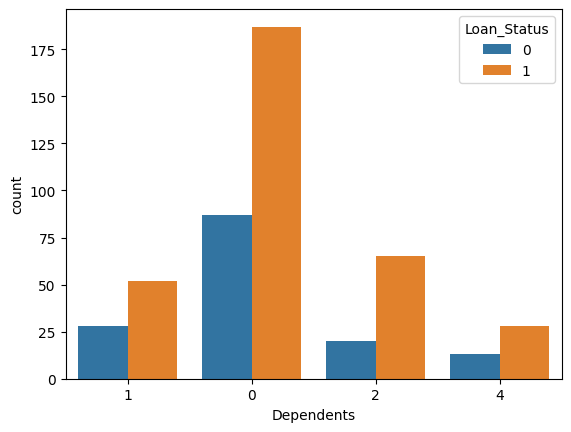

In [ ]:
# visualisation of data for Dependents with loan_status
sb.countplot(x='Dependents',hue='Loan_Status',data=data)

In [ ]:
# separarating data and label
x=data.drop(columns=['Loan_Status','Loan_ID'])
y=data['Loan_Status']

In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [ ]:
y,y.value_counts()

(1      0
 2      1
 3      1
 4      1
 5      1
       ..
 609    1
 610    1
 611    1
 612    1
 613    0
 Name: Loan_Status, Length: 480, dtype: int64,
 Loan_Status
 1    332
 0    148
 Name: count, dtype: int64)

In [ ]:
# spiliting data into training data and testing data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [ ]:
x.shape,x_train.shape,x_test.shape

((480, 11), (432, 11), (48, 11))

# Training the model

In [ ]:
#  classifier for svm of SVC (this is a classifier model)
classifier=svm.SVC(kernel='linear')

In [ ]:
# training the model by support vector machine
classifier.fit(x_train,y_train)

SVC(kernel='linear')

# model evaulation

In [ ]:
#  model evalution:-by checking the accuracy in general training_accuracy is greater then test_accuracy
# training accuracy > 70%
x_train_predection=classifier.predict(x_train)
training_accuracy=accuracy_score(x_train_predection,y_train)

In [ ]:
training_accuracy

0.7986111111111112

In [ ]:
# test_accuracy > 70%
x_test_predection=classifier.predict(x_test)
test_accuracy=accuracy_score(x_test_predection,y_test)

In [ ]:
test_accuracy

0.8333333333333334

# Predictive system for next coming data 

In [ ]:
# input data for prediction

input_data=(1,1,0,1,0,2333,1516,95,360,1,2)  # Y (L13)  ('Male','Yes',0,'Not Graduate','No',2333,1516,95,360,1,'Urban')                  
input_data=(1,1,4,1,0,3036,2504,158,360,0,1) # N (L14)  input_data=('Male','Yes','3+','Graduate','No',3036,2504,158,360,0,'Semiurban')   

# convert the input in numpy array so that the process is faster
input_data_as_numpy_array=np.asarray(input_data)
# reshape the numpy array as we pridict for one instance otherwise model get confusused after shaw the more no. of data
in_data=input_data_as_numpy_array.reshape(1,-1)

In [ ]:
# prediction of input data
ANS=classifier.predict(in_data)
if ANS==1:
    print("Person is eligible for loan.",ANS)
elif ANS==0:
    print("Person is not eligible for loan.",ANS)

Person is not eligible for loan. [0]
